# Titanic : "Survival or Not"

## Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

## Data Dictionary
Survival ||| Survival ||| 0 = No, 1 = Yes

Pclass ||| Ticket class ||| 1 = 1st, 2 = 2nd, 3 = 3rd

Sex ||| Sex	

Age ||| Age in years	

Sibsp ||| Number of siblings/spouses aboard the Titanic	

Parch ||| Number of parents/children aboard the Titanic	

Ticket ||| Ticket number	

Fare ||| Passenger fare	

Eabin ||| Cabin number	

Embarked ||| Port of Embarkation ||| C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
# importing Important libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
print("import complete")

import complete


### loading dataset

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv") 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Can see some null values in the dataset

### Exploring the dataset

In [4]:
#checking dataset shape 
data.shape

(891, 12)

In [5]:
#dataset has 891 rows and 12 columns

In [6]:
#checking column names in dataset
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#checking datatypes
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
#checking more info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#there are some null values in Age, Cabin and Embarked
#there are 2 float attributes 5 integer and 5 object and a total of 891 entries

In [10]:
# checking statistical summary all the columns
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sandstrom, Miss. Marguerite Rut",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [11]:
# above tells about the statistical summary of the dataset for all the columns for example
#example : 
#column Age has mean of 29.699 standard deviation of 14.526 min value 0.42 which is 
#not possible so it means Age column has some outliers 25%,75% are the lower and upper quartile 
#respectively, 50% is the median


In [12]:
#checking for null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#Age has 177, Cabin has 687, Embarked has 2 missing values respectively

In [14]:
#checking the survived column values
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
#checking unique places peoople embarked
print(data.Embarked.unique())

['S' 'C' 'Q' nan]


In [16]:
#from above we can see people mainly embarked at 3 differenet places and some values are null

In [17]:
#checking unique values for cabin
print(data.Cabin.unique())
print(data.Cabin.nunique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
147


In [18]:
#from above we can see that there records of only 147 cabins out 891 cabins

## Visualisation and Analysis

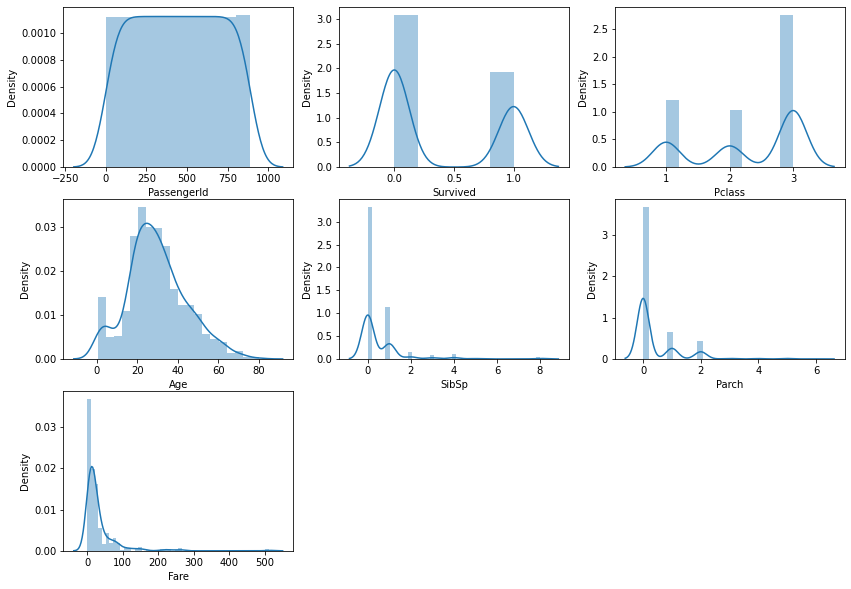

In [19]:
#distribution plots
df = data.select_dtypes(exclude="object")
plot = 1
plt.figure(figsize=(14,10))
for i in df.columns:
    plt.subplot(3,3,plot)
    sns.distplot(df[i])
    plot+=1
plt.show()

From above plots we can say that Fare and Age columns are not normally distributed

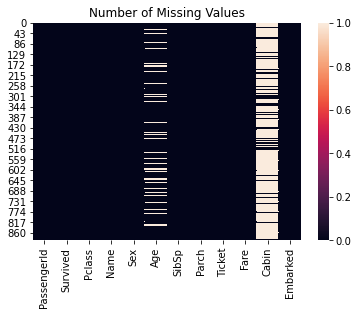

In [20]:
#visualising for missing values
plt.title("Number of Missing Values")
sns.heatmap(data.isnull())
plt.show()

The above plot indicates the presence of missing values

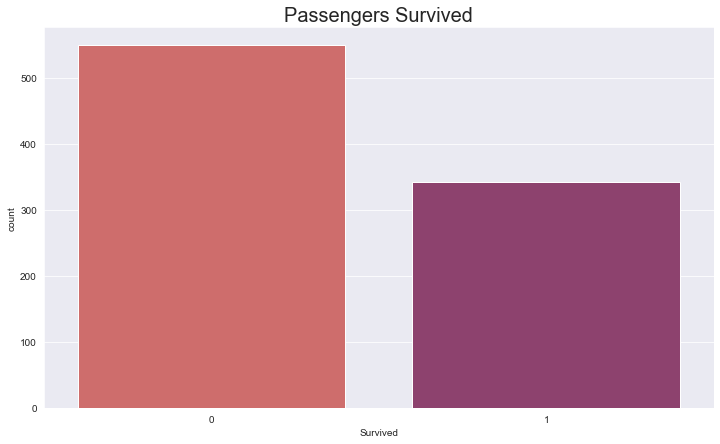

In [21]:
# plotting the distribution of survived passengers
plt.figure(figsize=(12,7))
sns.set_style("darkgrid")
plt.title("Passengers Survived",fontsize=20)
sns.countplot(data.Survived,palette='flare')
plt.show()

Most of the passengers did not survive 

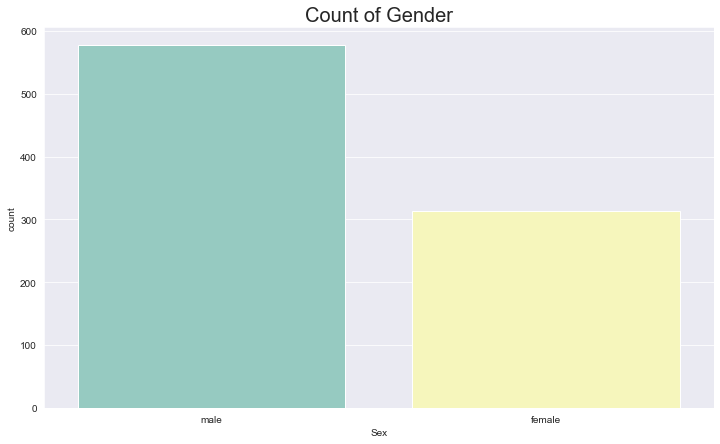

In [22]:
# plotting the distribution of genders
plt.figure(figsize=(12,7))
plt.title("Count of Gender",fontsize=20)
sns.countplot(data.Sex,palette='Set3')
plt.show()

Mostly passengers are males

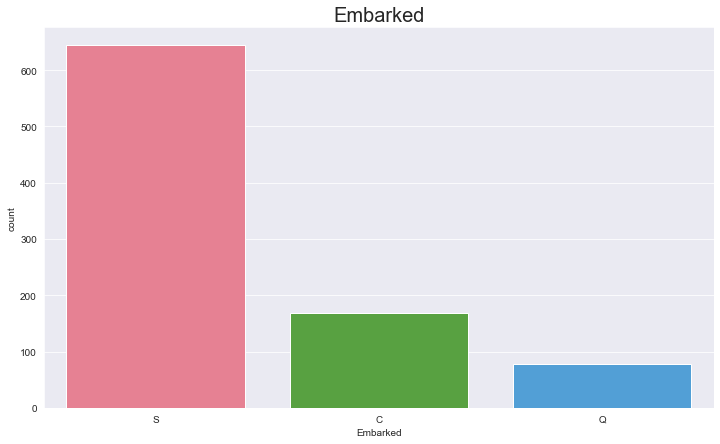

In [23]:
# plotting the plces of embarkment
plt.figure(figsize=(12,7))
plt.title("Embarked",fontsize=20)
sns.countplot(data.Embarked,palette='husl')
plt.show()

Most passengers embarked at Southampton 

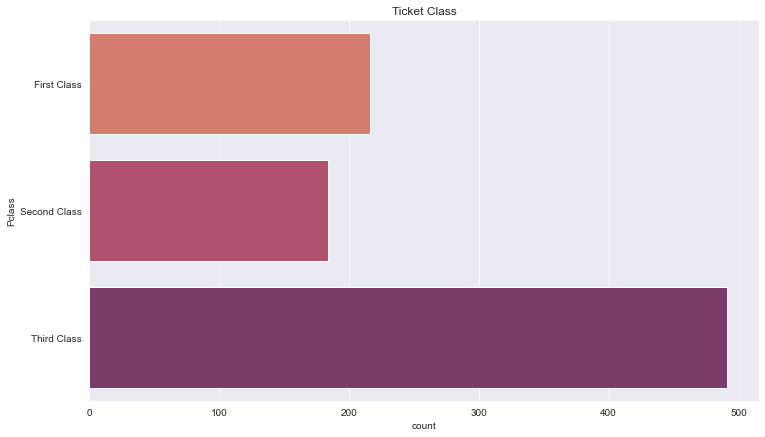

In [24]:
# plotting for the ticket class of passengers
plt.figure(figsize=(12,7))
plt.title("Ticket Class")
sns.countplot(y=data.Pclass,palette='flare')
plt.yticks([0,1,2],['First Class','Second Class','Third Class'])
plt.show()

Mostly passengers have 3rd class tickets

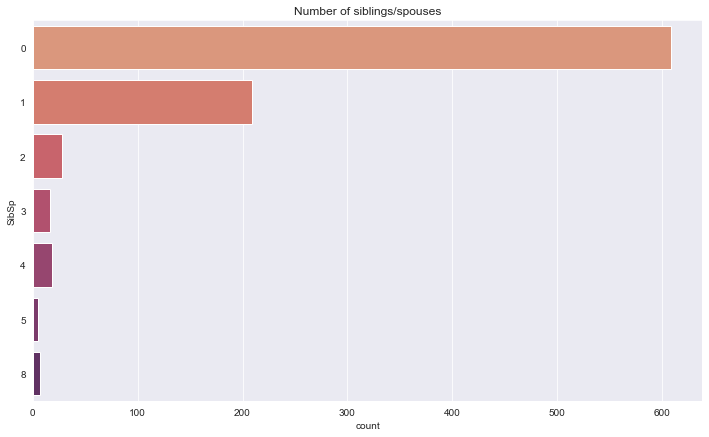

In [25]:
#plotting for Number of siblings/spouses aboard the Titanic
plt.figure(figsize=(12,7))
plt.title("Number of siblings/spouses")
sns.countplot(y=data.SibSp,palette='flare')
plt.show()

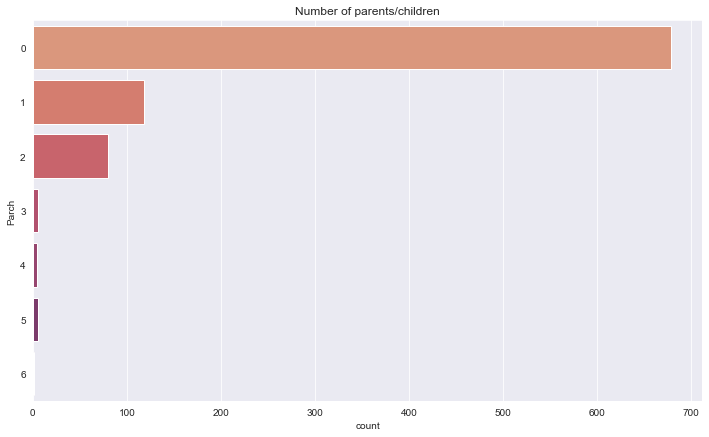

In [26]:
#plotting for Number of parents/children aboard the Titanic
plt.figure(figsize=(12,7))
plt.title("Number of parents/children")
sns.countplot(y=data.Parch,palette='flare')
plt.show()

From the above two plots we can visualise that most of the passengers were alone or majorly were accomapied by either their sibling/spouse or a parent/child

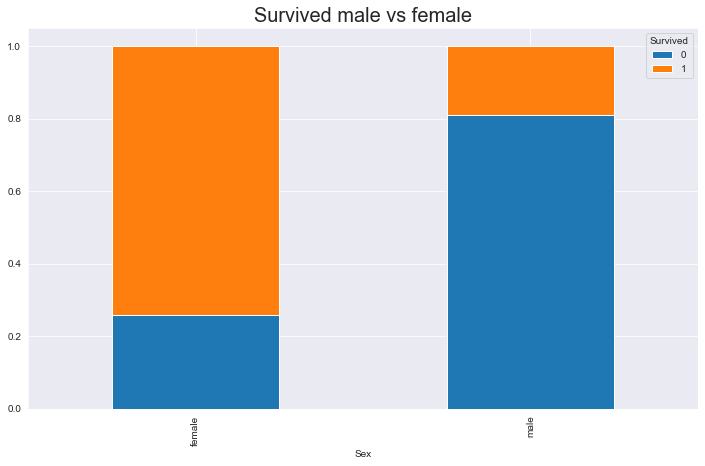

In [27]:
# checking if survived passengers are more males or women
sex=pd.crosstab(data.Sex,data.Survived)
sex.div(sex.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7))
plt.title("Survived male vs female",fontsize=20)
plt.show()

From above plot we can say that more males died as compared to females

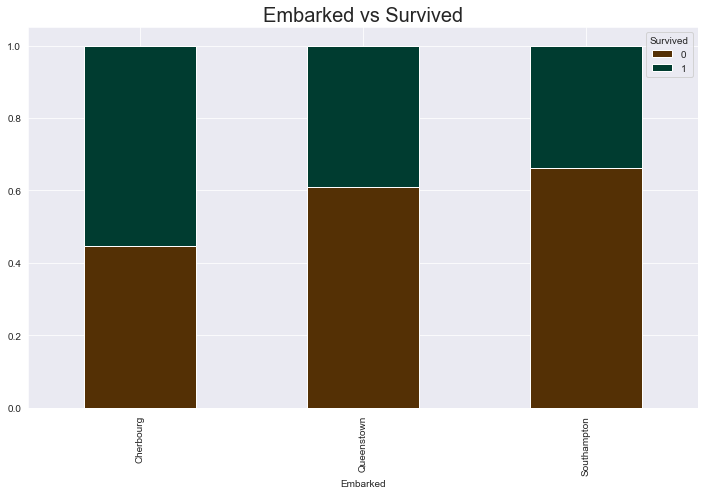

In [28]:
#plotting survival with respect to emabarkment of passengers
embark=pd.crosstab(data.Embarked,data.Survived)
embark.div(embark.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='BrBG')
plt.title("Embarked vs Survived",fontsize=20)
plt.xticks([0,1,2],['Cherbourg','Queenstown','Southampton'])
plt.show()

Marjorly passengers who embarked at Southampton did not survive

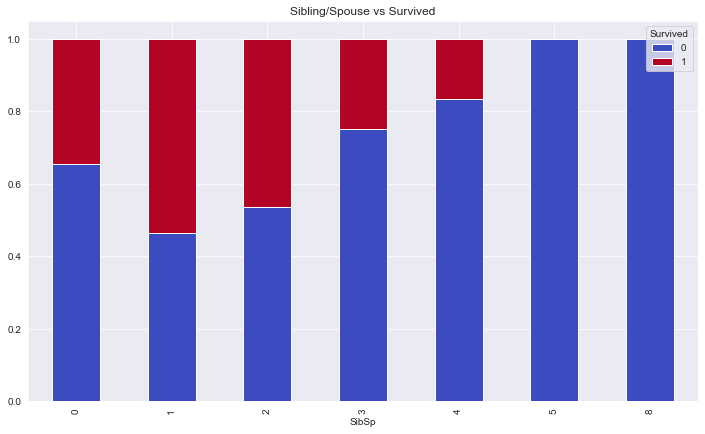

In [29]:
#plotting Survival with respect to number of siblings/spouse with the passenger
sbsp = pd.crosstab(data.SibSp,data.Survived)
sbsp.div(sbsp.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='coolwarm')
plt.title("Sibling/Spouse vs Survived")
plt.show()

Passengers with more number of sibling/spouse were not able to survive

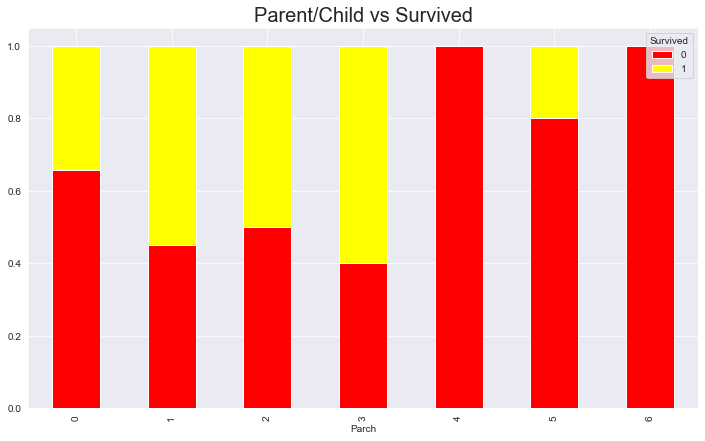

In [30]:
prch = pd.crosstab(data.Parch,data.Survived)
prch.div(prch.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='autumn')
plt.title("Parent/Child vs Survived",fontsize=20)
plt.show()

Passengers with more number of parent/child were not able to survive

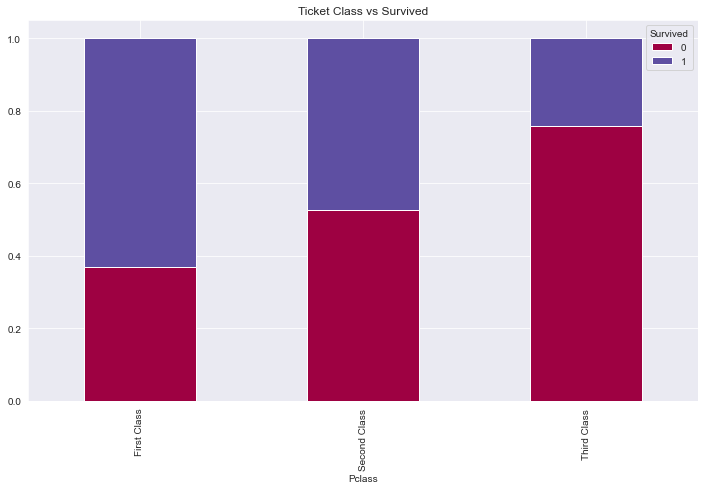

In [31]:
class_=pd.crosstab(data.Pclass,data.Survived)
class_.div(class_.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='Spectral')
plt.title("Ticket Class vs Survived")
plt.xticks([0,1,2],['First Class','Second Class','Third Class'])
plt.show()

Passengers who had third Class ticket died more in number as compared to other ticket classes

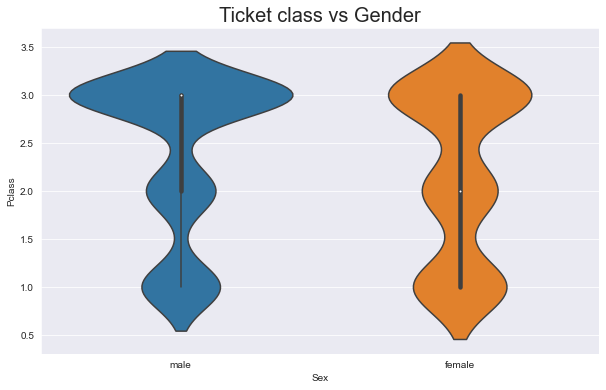

In [32]:
plt.figure(figsize=(10,6))
plt.title("Ticket class vs Gender",fontsize=20)
sns.violinplot(data.Sex,data.Pclass)
plt.show()

From the above violin plot we can infer that males have more third class ticket as compared to females and females have more first class ticket as compared to males

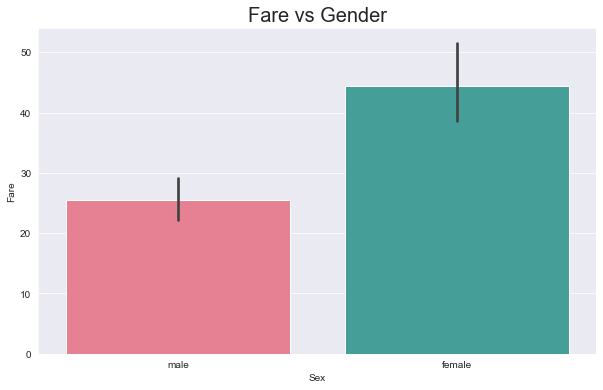

In [33]:
plt.figure(figsize=(10,6))
plt.title("Fare vs Gender",fontsize=20)
sns.barplot(data.Sex,data.Fare,palette="husl")
plt.show()

Female passengers have more fare than male passengers

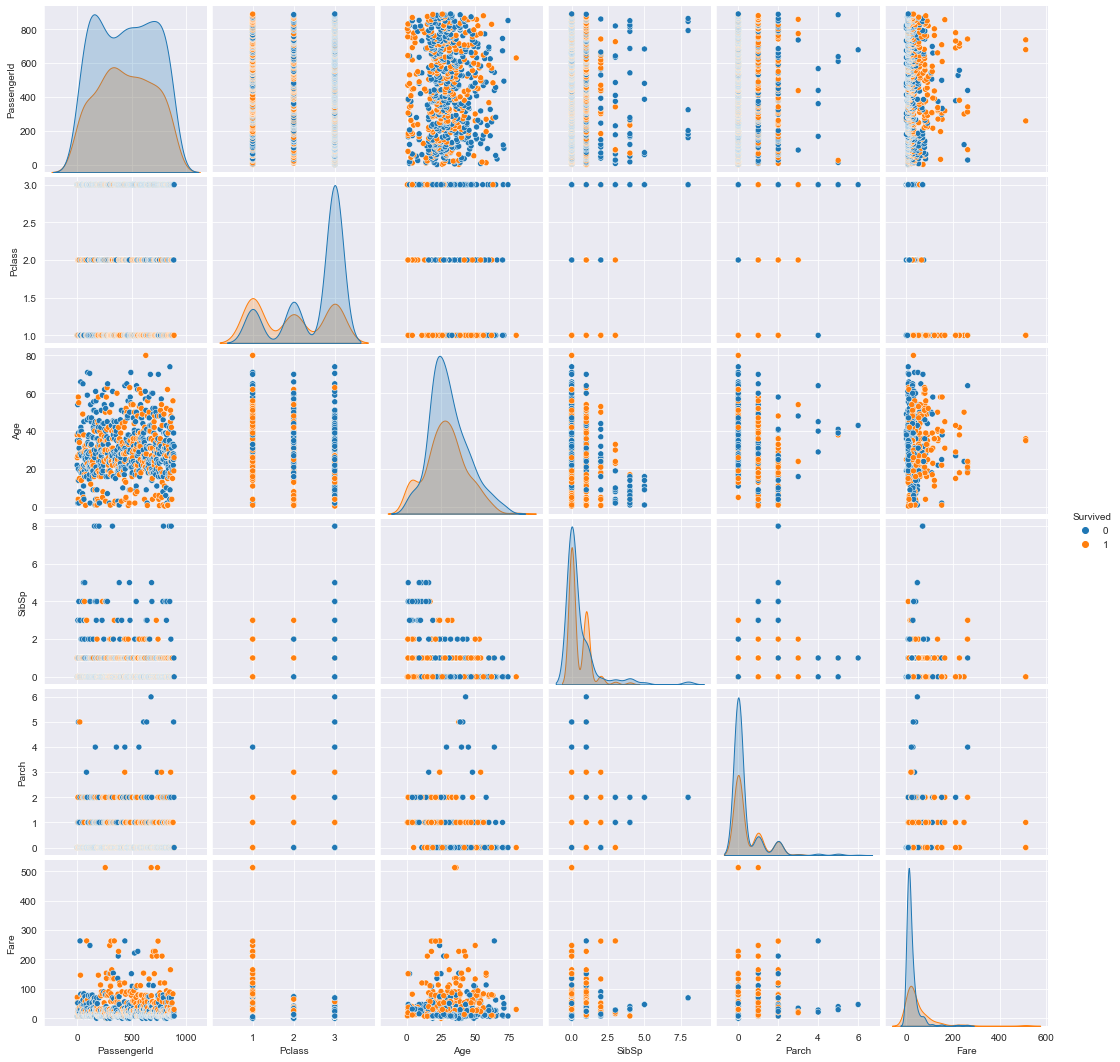

In [34]:
sns.pairplot(data,hue='Survived')

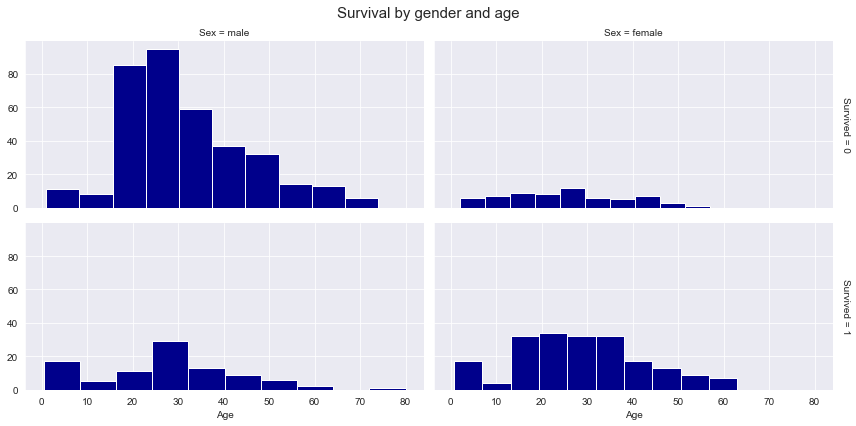

In [35]:
graph = sns.FacetGrid(data,row='Survived',col='Sex',margin_titles=True,aspect=2)
graph.map(plt.hist,'Age',color="darkblue")
plt.subplots_adjust(top=0.9)
graph.fig.suptitle("Survival by gender and age",fontsize=15)
plt.show()

From the above plot we can infer that females survived more than males and majorly males who died were in the age range of 20-40

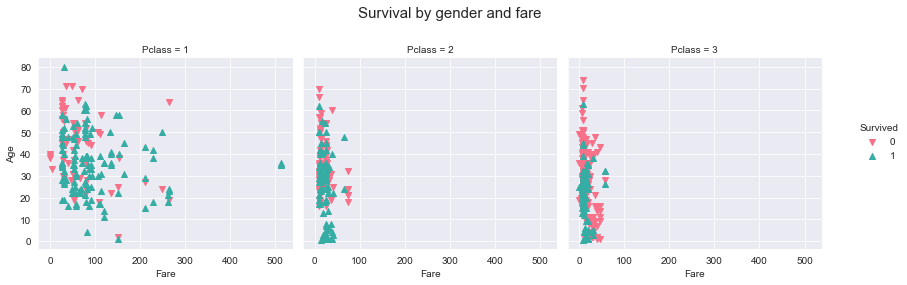

In [36]:
g = sns.FacetGrid(data,col='Pclass',hue='Survived',margin_titles=True,hue_kws=dict(marker=['v','^']),height=4,aspect=1,palette='husl') 
g.map(plt.scatter,'Fare','Age').add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Survival by gender and fare",fontsize=15)
plt.show()

- First class has more fare and mostly people from higher age groups
- Second and third class have more number of people from first class
- people majorly died from third class

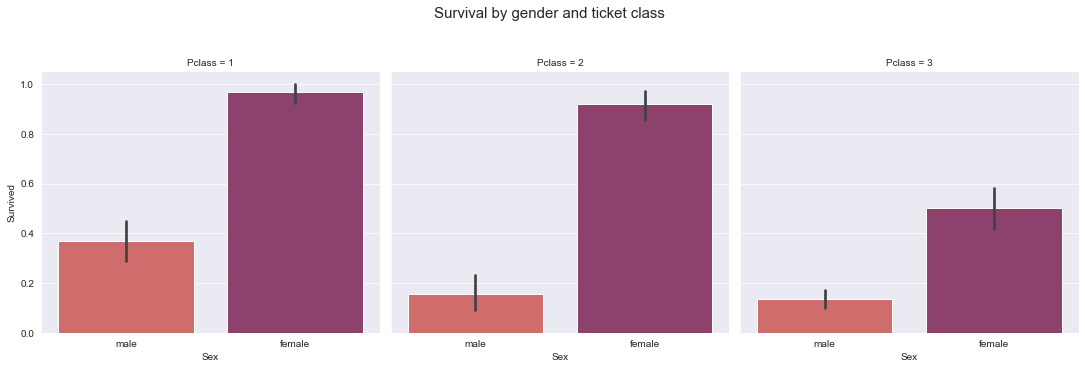

In [37]:
p = sns.factorplot(x='Sex',y='Survived',col='Pclass',data=data,kind='bar',palette='flare')
plt.subplots_adjust(top=0.8)
p.fig.suptitle("Survival by gender and ticket class",fontsize=15)
plt.show()

- Both males and females from third class died more than other two classes
- Survival rate of women is more than men in any of the classes

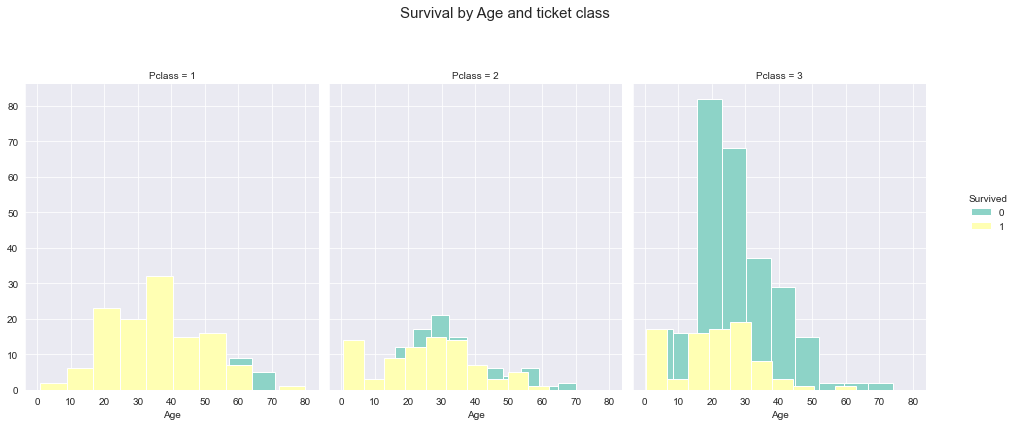

In [38]:
gr = sns.FacetGrid(data,col='Pclass',hue='Survived',margin_titles=True,height=6,aspect=0.75,palette='Set3') 
gr.map(plt.hist,'Age').add_legend()
plt.subplots_adjust(top=0.8)
gr.fig.suptitle("Survival by Age and ticket class",fontsize=15)
plt.show()

- Most People survived from first class
- In second and third class survival rate is somewhat equal
- people between age range 20-40 died more

In [39]:
#correlation matrix
cor = data.corr()
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


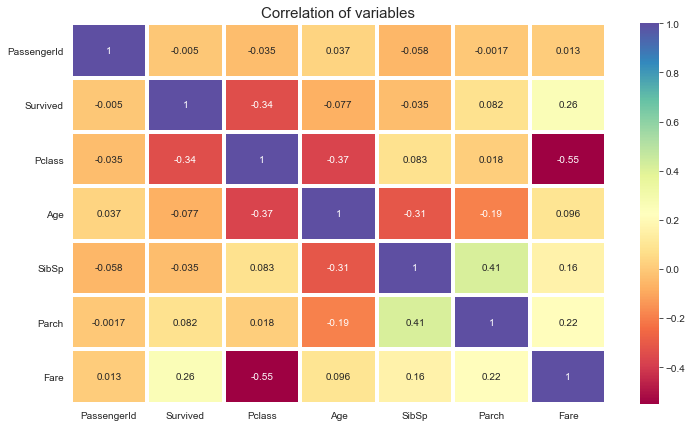

In [40]:
#plotting Correlation matrix
plt.figure(figsize=(12,7))
plt.title("Correlation of variables",fontsize=15)
sns.heatmap(cor,annot=True,linewidth = 3, linecolor='white',cmap='Spectral')
plt.show()

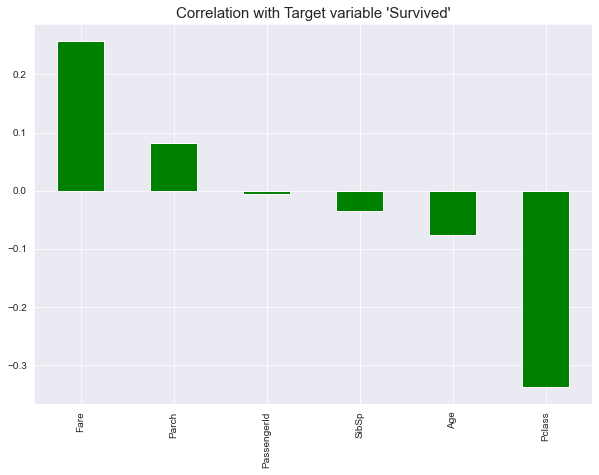

In [41]:
#correlation with target variable
plt.title("Correlation with Target variable 'Survived'",fontsize=15)
cor.Survived.sort_values(ascending=False).drop(['Survived']).plot(kind='bar',figsize=(10,7),color='g')
plt.show()

- From plot above we can see the correlation of variables with target variable "Survived"
- Fare has highest positive corelation and Pclass has highestnegative correlation
- PassengerID has the least correlation

### Data preparation and cleaning

In [42]:
# dropping Passenger ID ,Name, Ticket, Cabin since they are not necessary for target variable
data.drop(['PassengerId','Name','Ticket','Cabin'],inplace=True,axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [43]:
data.shape

(891, 8)

#### Handling missing values

In [44]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [45]:
#We will treat missing values in Age column with median
#filling embark with S as it is more frequently occuring
data.Age = data.Age.fillna(data.Age.median())
data.Embarked.fillna("S",inplace=True)

In [46]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### detecting and removal of outliers

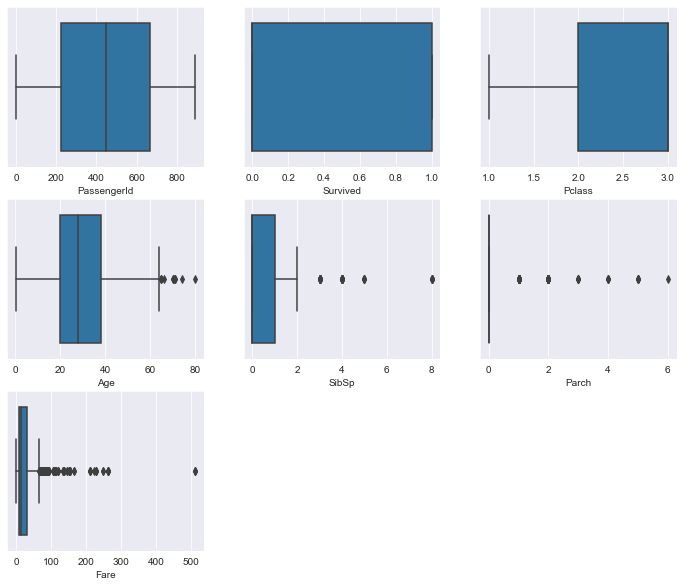

In [47]:
### visualising outliers with help of boxplots
plot = 1
plt.figure(figsize=(12,10))
for i in df.columns:
    plt.subplot(3,3,plot)
    sns.boxplot(df[i])
    plot+=1
plt.show()

From Above plots we can see that Age, Sibsp, Parch and fare have outliers, so since we have small dataset will not be replacing the outliers with mean and median depending upon the distribution

In [48]:
# removal of outliers
def detect_outliers(df,features):
    
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        return outlier_indices

In [49]:
remove_outliers=detect_outliers(data,["Age","SibSp","Parch","Fare"])

In [50]:
data = data.drop(remove_outliers, axis = 0).reset_index(drop=True)

In [51]:
data.shape

(825, 8)

### checking the skewness of data

In [52]:
data.skew()

Survived    0.492699
Pclass     -0.706008
Age         0.169221
SibSp       3.892664
Parch       2.922540
Fare        4.939703
dtype: float64

In [53]:
data.Fare=np.log(data.Fare+1)

In [54]:
data.skew()

Survived    0.492699
Pclass     -0.706008
Age         0.169221
SibSp       3.892664
Parch       2.922540
Fare        0.419042
dtype: float64

Since SibSp and Parch are ordinal features will not be treating them for skewness

### Encoding the dataset for categorical features

In [55]:
dummy = pd.get_dummies(data[['Sex','Embarked']])
dummy

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
820,0,1,0,0,1
821,1,0,0,0,1
822,1,0,0,0,1
823,0,1,1,0,0


In [56]:
# concatinating the dummy columns
data = pd.concat([data,dummy],axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,2.110213,S,0,1,0,0,1
1,1,1,female,38.0,1,0,4.280593,C,1,0,1,0,0
2,1,3,female,26.0,0,0,2.188856,S,1,0,0,0,1
3,1,1,female,35.0,1,0,3.990834,S,1,0,0,0,1
4,0,3,male,35.0,0,0,2.202765,S,0,1,0,0,1


In [57]:
#since we do not need Sex and Embarked features we will drop them
data.drop(['Sex','Embarked'],axis=1,inplace=True)

### Splitting the dataset into feature and target variables

In [58]:
X = data.drop(['Survived'],axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,2.110213,0,1,0,0,1
1,1,38.0,1,0,4.280593,1,0,1,0,0
2,3,26.0,0,0,2.188856,1,0,0,0,1
3,1,35.0,1,0,3.990834,1,0,0,0,1
4,3,35.0,0,0,2.202765,0,1,0,0,1


In [59]:
y = data["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
820    0
821    1
822    0
823    1
824    0
Name: Survived, Length: 825, dtype: int64

### Train/Test split

In [60]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print(xtrain.shape,xtest.shape)
print(ytrain.shape,ytest.shape)

(660, 10) (165, 10)
(660,) (165,)


## Model Building 

In [61]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,roc_auc_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV

In [62]:
# Will be creating pipelines for the further process
# 1. Data pre-processing by standard scalar
# 2. Applying classifier

In [63]:
pipeline_lr = Pipeline([('scalar1',StandardScaler()),
                       ('logistic_regression',LogisticRegression())])

In [64]:
pipeline_knn = Pipeline([('scalar2',StandardScaler()),
                        ('KNN',KNeighborsClassifier())])

In [65]:
pipeline_svc = Pipeline([('scalar3',StandardScaler()),
                        ('SVC',SVC())])

In [66]:
pipeline_dt = Pipeline([('scalar4',StandardScaler()),
                        ('DecisionTree',DecisionTreeClassifier())])

In [67]:
pipeline_rf = Pipeline([('scalar5',StandardScaler()),
                        ('Random Forest',RandomForestClassifier())])

In [68]:
pipeline_adb = Pipeline([('scalar6',StandardScaler()),
                        ('Adaboost',AdaBoostClassifier())])

In [69]:
pipeline_gb = Pipeline([('scalar7',StandardScaler()),
                        ('Gradient Boost',GradientBoostingClassifier())])

In [70]:
pipeline_nb = make_pipeline(StandardScaler(),BernoulliNB())

In [71]:
pipelines = [pipeline_lr,pipeline_knn,pipeline_svc,pipeline_dt,pipeline_rf,pipeline_adb,pipeline_gb,pipeline_nb]  

In [72]:
#fitting the pipelines
for pipe in pipelines:
    pipe.fit(xtrain,ytrain)
    
# dict for refrence of models 
pipe_dict = {0:"Logistic Rgression",1:"K nearest neighbors",2:"Support Vector machine",
            3:"Decision Trees",4:"Random Forest",5:"Adaboost",6:"Gradient Boosting",7:"Naive Bayes"}

In [73]:
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('bernoullinb', BernoulliNB())])

### Evaluating models 


Logistic Rgression Accuracy Score : 0.793939393939394

Logistic Rgression Classification report : 
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       102
           1       0.74      0.71      0.73        63

    accuracy                           0.79       165
   macro avg       0.78      0.78      0.78       165
weighted avg       0.79      0.79      0.79       165


Logistic Rgression Cross val score : 
0.8045454545454547

Logistic Rgression Roc_auc score : 0.7787114845938377

 Logistic Rgression F1_score : 0.7932779090624377


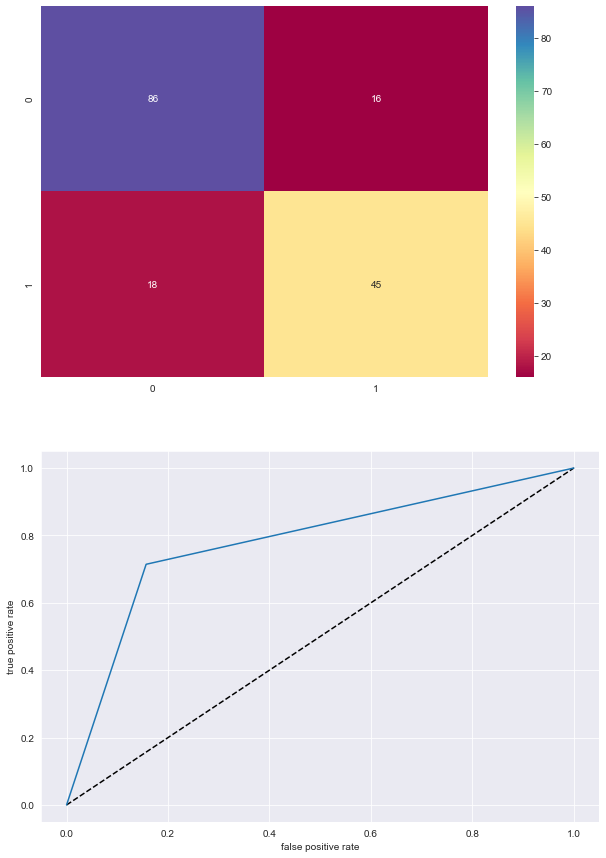


K nearest neighbors Accuracy Score : 0.8

K nearest neighbors Classification report : 
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       102
           1       0.74      0.73      0.74        63

    accuracy                           0.80       165
   macro avg       0.79      0.79      0.79       165
weighted avg       0.80      0.80      0.80       165


K nearest neighbors Cross val score : 
0.7742424242424243

K nearest neighbors Roc_auc score : 0.7866479925303455

 K nearest neighbors F1_score : 0.7996878048780488


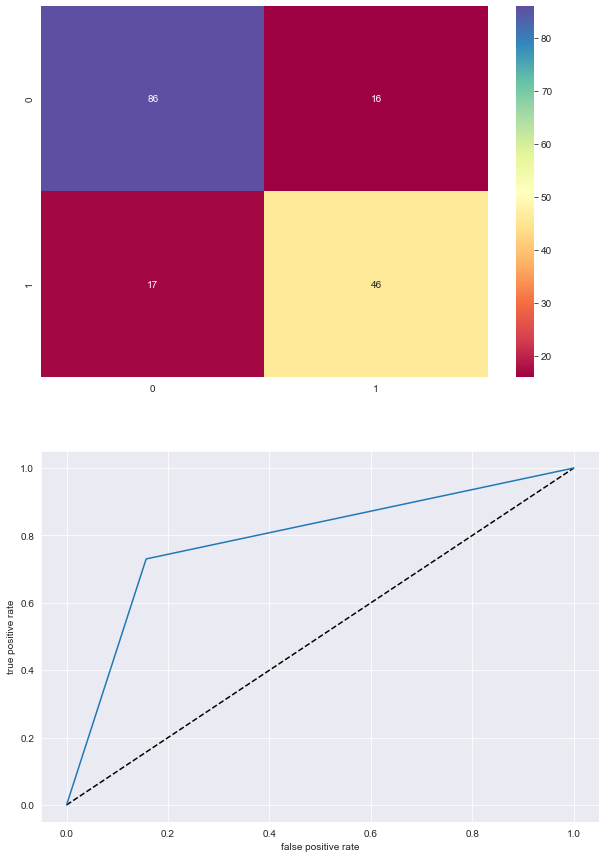


Support Vector machine Accuracy Score : 0.8242424242424242

Support Vector machine Classification report : 
              precision    recall  f1-score   support

           0       0.82      0.91      0.87       102
           1       0.83      0.68      0.75        63

    accuracy                           0.82       165
   macro avg       0.82      0.80      0.81       165
weighted avg       0.82      0.82      0.82       165


Support Vector machine Cross val score : 
0.7893939393939393

Support Vector machine Roc_auc score : 0.7971521942110177

 Support Vector machine F1_score : 0.8203327511719827


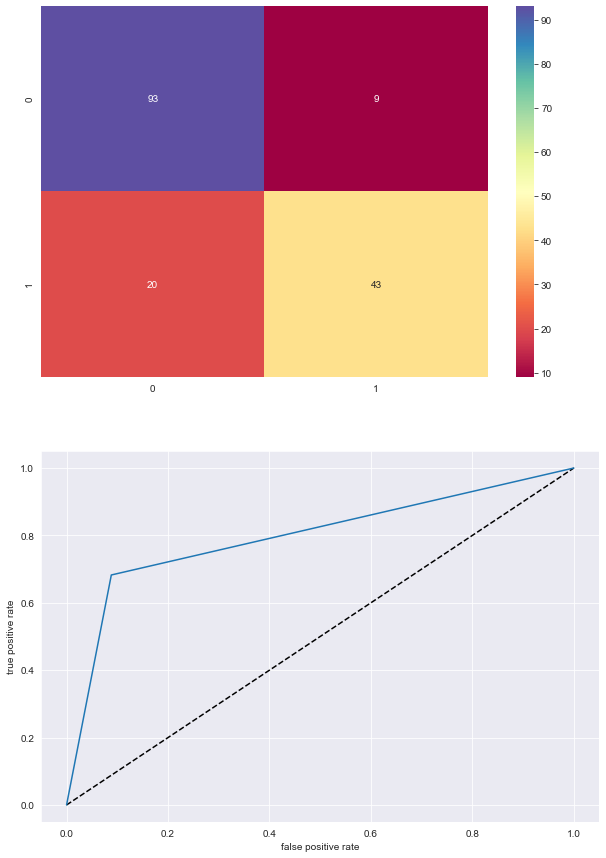


Decision Trees Accuracy Score : 0.7515151515151515

Decision Trees Classification report : 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       102
           1       0.68      0.67      0.67        63

    accuracy                           0.75       165
   macro avg       0.74      0.74      0.74       165
weighted avg       0.75      0.75      0.75       165


Decision Trees Cross val score : 
0.7681818181818182

Decision Trees Roc_auc score : 0.7352941176470588

 Decision Trees F1_score : 0.7511272727272728


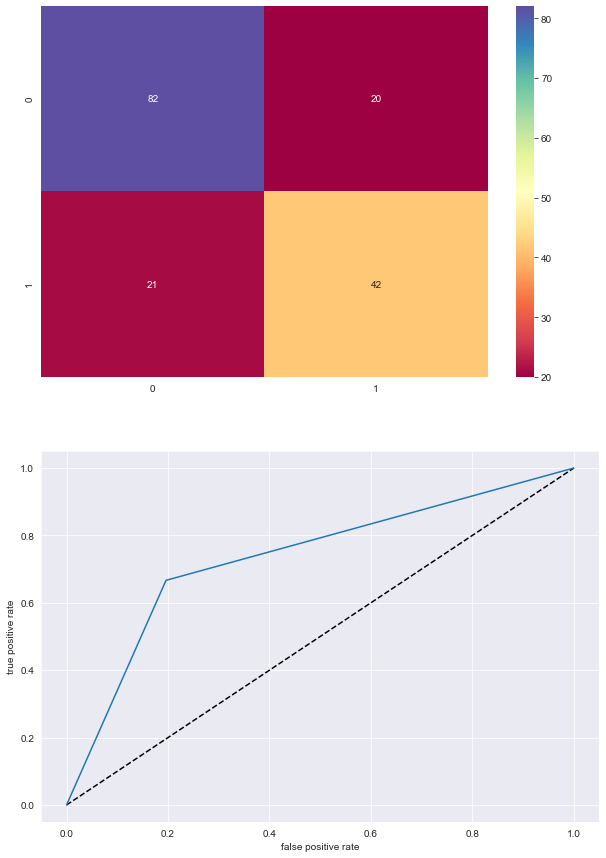


Random Forest Accuracy Score : 0.7696969696969697

Random Forest Classification report : 
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       102
           1       0.70      0.70      0.70        63

    accuracy                           0.77       165
   macro avg       0.76      0.76      0.76       165
weighted avg       0.77      0.77      0.77       165


Random Forest Cross val score : 
0.8030303030303031

Random Forest Roc_auc score : 0.7560690943043884

 Random Forest F1_score : 0.7696969696969697


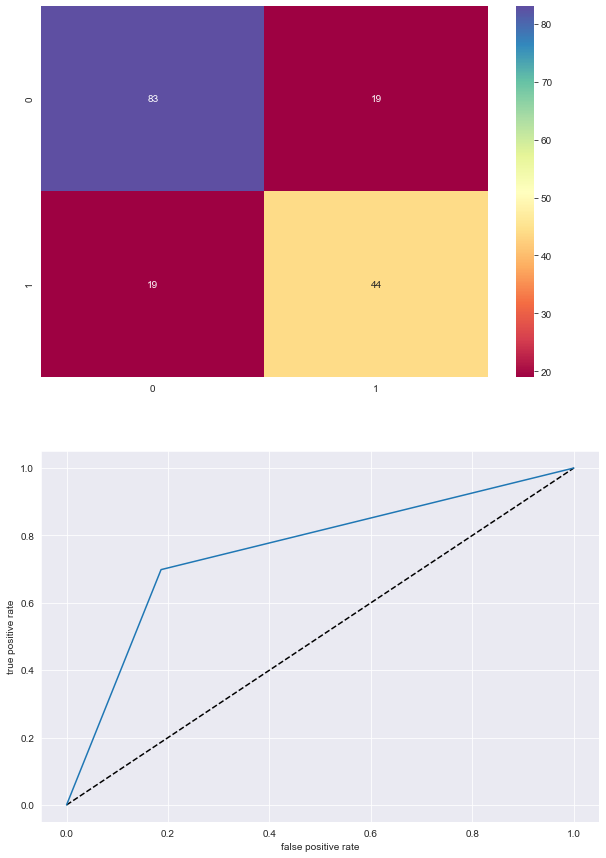


Adaboost Accuracy Score : 0.7878787878787878

Adaboost Classification report : 
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       102
           1       0.73      0.70      0.72        63

    accuracy                           0.79       165
   macro avg       0.78      0.77      0.77       165
weighted avg       0.79      0.79      0.79       165


Adaboost Cross val score : 
0.7969696969696971

Adaboost Roc_auc score : 0.7707749766573295

 Adaboost F1_score : 0.7868290540612917


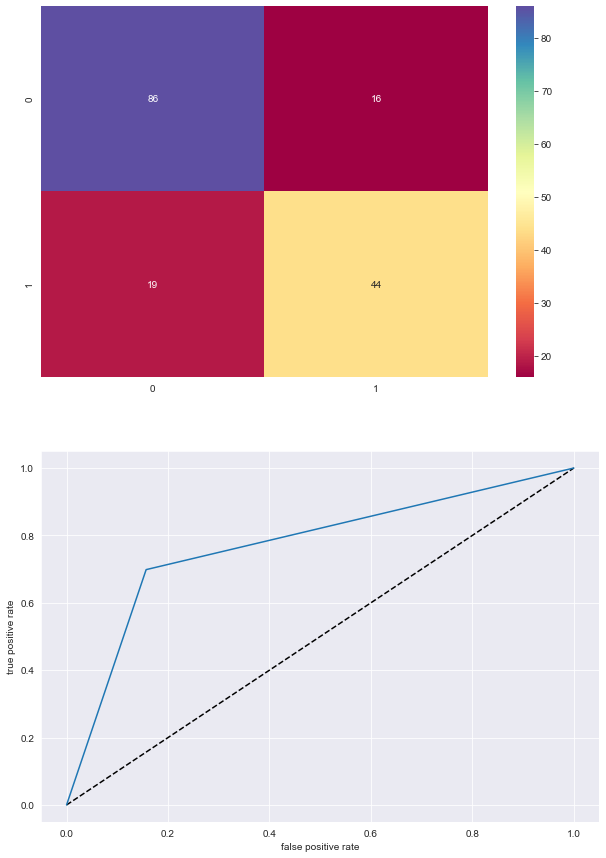


Gradient Boosting Accuracy Score : 0.8

Gradient Boosting Classification report : 
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       102
           1       0.78      0.67      0.72        63

    accuracy                           0.80       165
   macro avg       0.79      0.77      0.78       165
weighted avg       0.80      0.80      0.80       165


Gradient Boosting Cross val score : 
0.8166666666666667

Gradient Boosting Roc_auc score : 0.7745098039215685

 Gradient Boosting F1_score : 0.7965330444203683


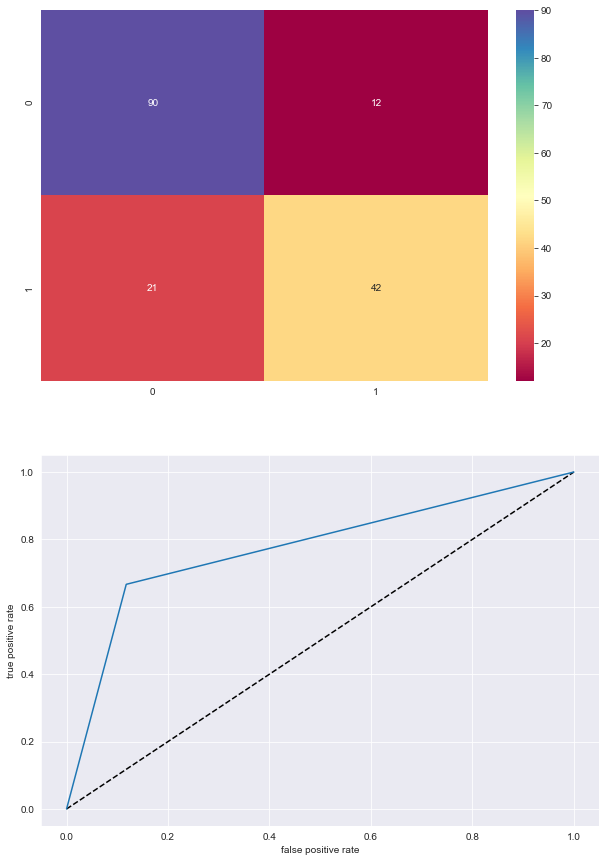


Naive Bayes Accuracy Score : 0.793939393939394

Naive Bayes Classification report : 
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       102
           1       0.72      0.76      0.74        63

    accuracy                           0.79       165
   macro avg       0.78      0.79      0.78       165
weighted avg       0.80      0.79      0.80       165


Naive Bayes Cross val score : 
0.7712121212121212

Naive Bayes Roc_auc score : 0.7878151260504201

 Naive Bayes F1_score : 0.7950489510489512


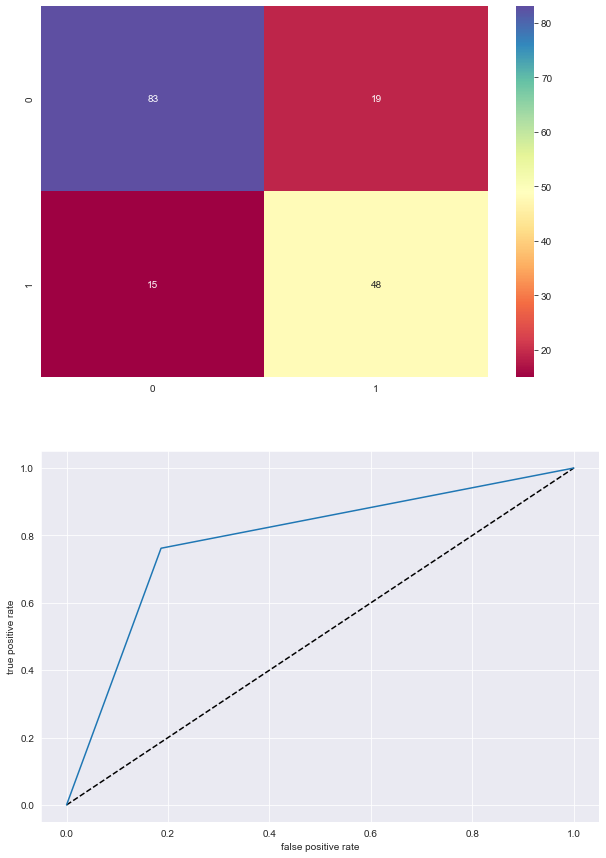

In [94]:

for i,model in enumerate(pipelines):
    print("\n{} Accuracy Score : {}".format(pipe_dict[i],accuracy_score(ytest,model.predict(xtest))))
    print("\n{} Classification report : \n{}".format(pipe_dict[i],classification_report(ytest,model.predict(xtest))))
    print("\n{} Cross val score : \n{}".format(pipe_dict[i],cross_val_score(model,xtrain,ytrain,cv=5,scoring="accuracy").mean()))
    fpr,tpr,thresholds=roc_curve(ytest,model.predict(xtest))
    roc_auc = auc(fpr,tpr)
    print("\n{} Roc_auc score : {}".format(pipe_dict[i],roc_auc))
    f1 = f1_score(ytest,model.predict(xtest),average='weighted')
    print("\n {} F1_score : {}".format(pipe_dict[i],f1))
    cm = confusion_matrix(ytest,model.predict(xtest))
    plt.figure(figsize=(10,15))
    plt.subplot(211)
    sns.heatmap(cm,annot=True,fmt='d',cmap='Spectral')
    plt.subplot(212)
    plt.plot([0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

In [98]:
# picking the best model
best_accuracy = 0
best_f1_score = 0
best_pipeline = ""
best_classifier = 0
for i,model in enumerate(pipelines):
    if ((model.score(xtest,ytest)>best_accuracy) and (f1_score(ytest,model.predict(xtest),average='weighted')>best_f1_score)):
        best_accuracy = model.score(xtest,ytest)
        best_f1_score = f1_score(ytest,model.predict(xtest),average='weighted')
        best_pipeline = model
        best_classifier = i
print('Best Model is {} '.format(pipe_dict[best_classifier]))

Best Model is Support Vector machine 


### Hyperparameter Tuning 

In [76]:
# Tuning the model for best parametrs
param_grid = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                 'gamma':['auto','scale'],
                 'C':[0.01,0.1,1.0,10]}
grid_search = RandomizedSearchCV(SVC(),param_grid,cv=5,verbose=5)
grid_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .C=0.1, gamma=auto, kernel=sigmoid;, score=0.621 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=auto, kernel=sigmoid;, score=0.621 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=auto, kernel=sigmoid;, score=0.621 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=auto, kernel=sigmoid;, score=0.621 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=auto, kernel=sigmoid;, score=0.614 total time=   0.0s
[CV 1/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.621 total time=   0.0s
[CV 2/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.621 total time=   0.0s
[CV 3/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.621 total time=   0.0s
[CV 4/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.621 total time=   0.0s
[CV 5/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.614 total time=   0.0s
[CV 1/5] END ...C=1.0, gamma=scale, kernel=poly;, score=0.705 total time=   0.0s
[CV 2/5] END ...C=1.0, gamma=scale, kernel=poly;

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.01, 0.1, 1.0, 10],
                                        'gamma': ['auto', 'scale'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=5)

In [77]:
# best parameters
grid_search.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'C': 1.0}

### Tuning the Model

In [89]:
#Tuning the model for better accuracy
mod = SVC(kernel='rbf',gamma='auto',C=1.0)
mod.fit(xtrain,ytrain)
print("Accuracy score: ",mod.score(xtest,ytest))

Accuracy score:  0.806060606060606


In [91]:
print("Cross validation score: ",cross_val_score(mod,xtrain,ytrain,cv=5,scoring="accuracy").mean())

Cross validation score:  0.8030303030303031


#### Since the accuracy has decreased by hyperparameter tuning, from before but the there is not much difference between cross val score and accuracy score which means the model is not biased as before because with default values the model was more biased since there was a lot difference between cross validation and accuracy. So wil be choosing this models with best parameters.

## Saving the model

In [99]:
import joblib 
joblib.dump(mod,"Titanic_model.pkl")

['Titanic_model.pkl']